## Plotting and styling vector data

In this notebook we will plot vector data - specifically wind - in two ways, as arrows and as wind flags/barbs.

Let's get some sample data from Storm Ophelia which hit UK in oct 2017.

In [1]:
import earthkit as ek

data = ek.data.from_source("sample", "storm_ophelia_wind_850.grib")
data.ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,u,isobaricInhPa,850,20171016,0,0,an,0,regular_ll
1,ecmf,v,isobaricInhPa,850,20171016,0,0,an,0,regular_ll


In [2]:
data.sel(short_name="v").ls()

,centre,shortName,typeOfLevel,level,dataDate,dataTime,stepRange,dataType,number,gridType
0,ecmf,v,isobaricInhPa,850,20171016,0,0,an,0,regular_ll


If you have some data with a U field and a V field, you can pass it straight to the `quiver` function - earthkit-plots will automatically detect which field is which and calculate speed and direction.

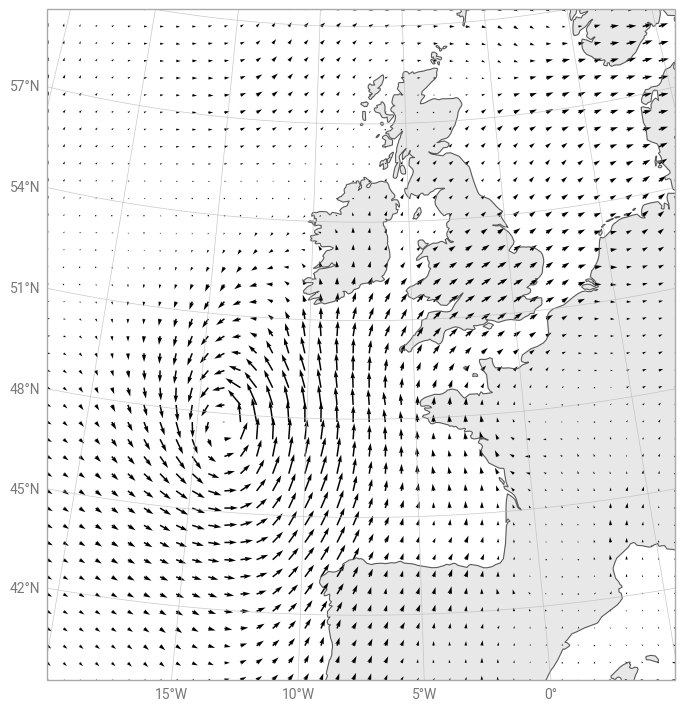

In [3]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

chart.quiver(data)

chart.coastlines()
chart.land()

chart.gridlines()

chart.show()

Equivalently, you can pass the U and V components separately as `u` and `v` arguments.

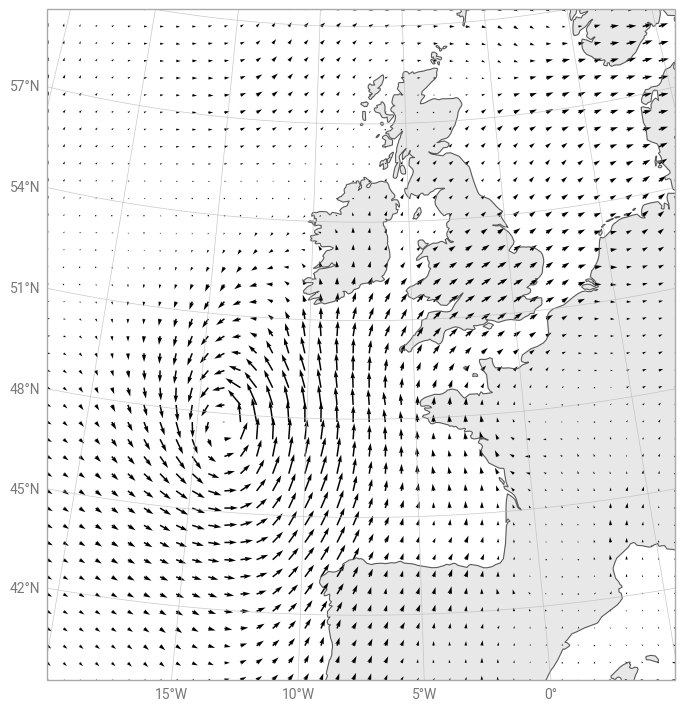

In [4]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

chart.quiver(u=data.sel(shortName="u"), v=data.sel(shortName="v"))

chart.coastlines()
chart.land()

chart.gridlines()

chart.show()

All the same rules apply to the `barbs` function, which works in the same way but produces wind flags/barbs.

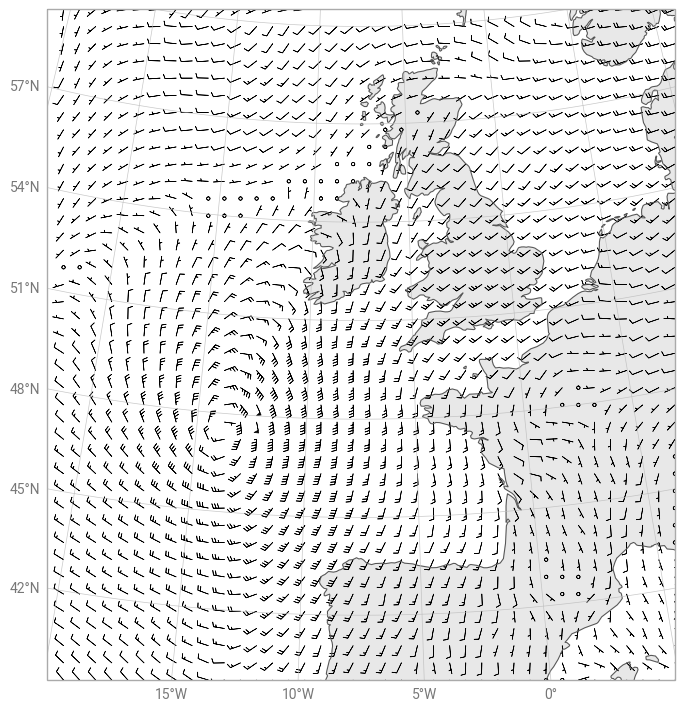

In [5]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

chart.barbs(data)

chart.coastlines()
chart.land()

chart.gridlines()

chart.show()

### Resampling wind vector locations

Given that some space is needed for flags and arrows, by default earthkit-plots will resample the data onto a 30x30 point grid on your `Map`'s target projection, ensuring a consistent density of arrows or flags in any projection.

However, you might want to 

In [6]:
from earthkit.plots.resample import Subsample, Regrid

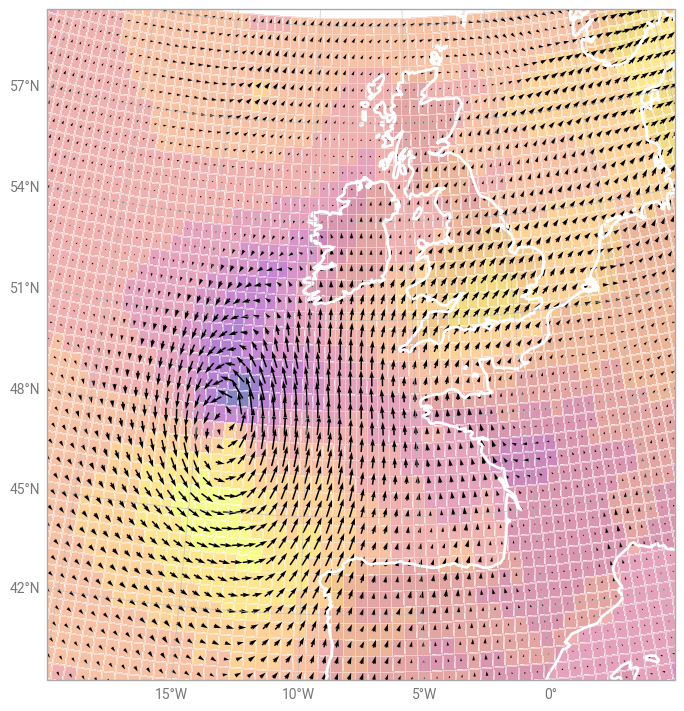

In [7]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

chart.grid_cells(data[0], edgecolors="white", linewidths=0.5, alpha=0.5)
chart.quiver(data, resample=Subsample(nx=1, ny=1, mode="stride"))

chart.coastlines(color="white", linewidth=2)
chart.land()

chart.gridlines()

chart.show()

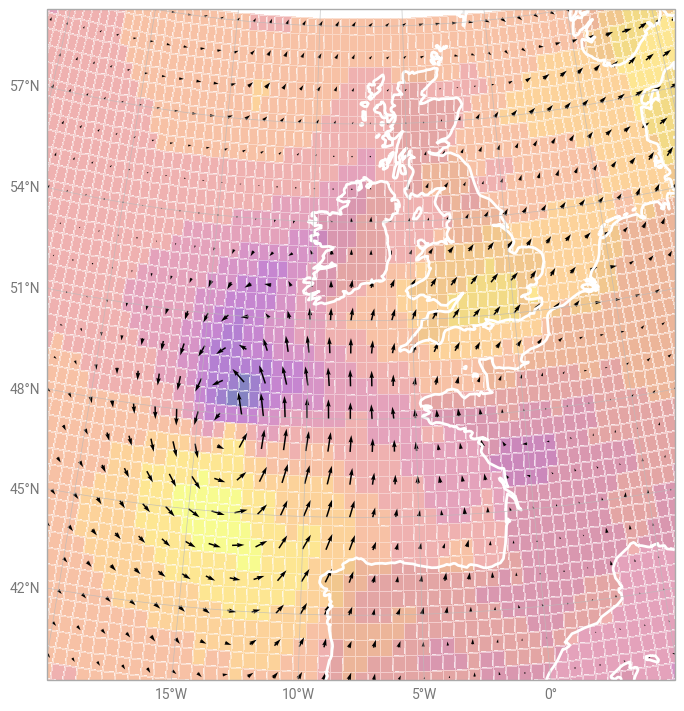

In [8]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

chart.grid_cells(data[0], edgecolors="white", linewidths=0.5, alpha=0.5)
chart.quiver(data, resample=Subsample(nx=2, ny=2, mode="stride"))

chart.coastlines(color="white", linewidth=2)
chart.land()

chart.gridlines()

chart.show()

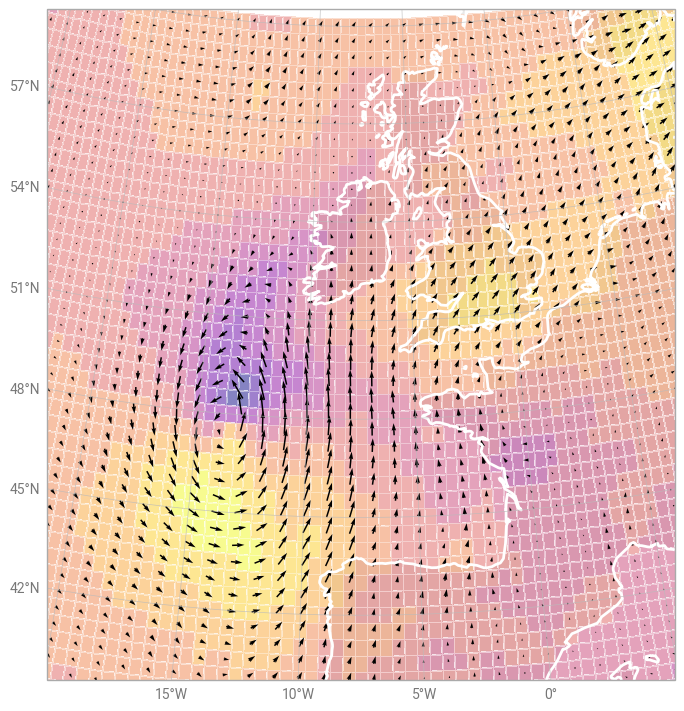

In [9]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

chart.grid_cells(data[0], edgecolors="white", linewidths=0.5, alpha=0.5)
chart.quiver(data, resample=Subsample(nx=30, ny=30, mode="fixed"))

chart.coastlines(color="white", linewidth=2)
chart.land()

chart.gridlines()

chart.show()

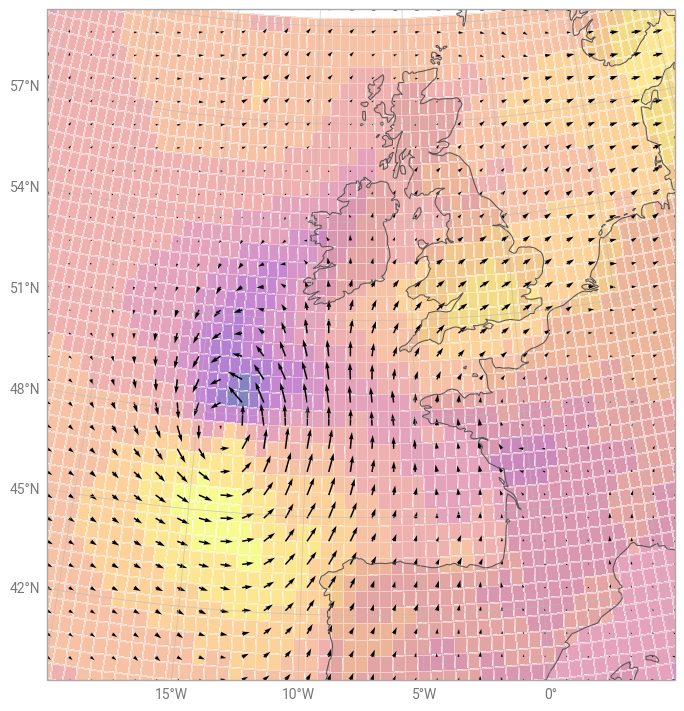

In [10]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

chart.grid_cells(data[0], edgecolors="white", linewidths=0.5, alpha=0.5)
chart.quiver(data, resample=Regrid(nx=30, ny=30))

chart.coastlines()
chart.land()

chart.gridlines()

chart.show()

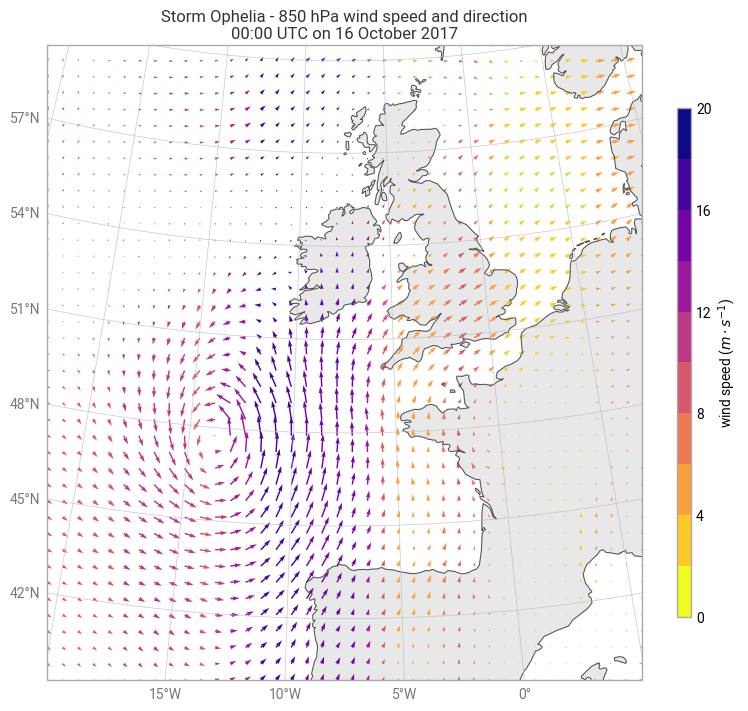

In [11]:
chart = ek.plots.Map(domain=[-20, 5, 40, 60])

style = ek.plots.styles.Style(
    colors="plasma_r",
    levels=range(0, 22, 2),
    units="m s-1",
)

chart.quiver(data, style=style)
chart.legend(label="wind speed ({units})", location="right")

chart.land()
chart.coastlines()
chart.gridlines()

chart.title(
    "Storm Ophelia - {level} hPa wind speed and direction\n"
    "{time:%H:%M UTC on %-d %B %Y}"
)

chart.show()